In [1]:
from astropy.io import fits
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import glob

In [2]:
QSO_name = 'PG1522+101'

In [3]:
rootdir = '/Users/thepoetoftwilight/Documents/CUBS/Data/' + QSO_name + '/STIS/'

In [4]:
file_list = glob.glob(rootdir + 'Old/Unstitched/*x1d.fits')

In [5]:
fits_list = [fits.open(f) for f in file_list]

In [6]:
n_exps = len(fits_list)
n_orders = fits_list[0][1].data.shape[0]
n_pixels = fits_list[0][1].data[0][2].shape[0]

In [7]:
fits_list[0][1].header

XTENSION= 'BINTABLE'           / binary table extension                         
BITPIX  =                    8 / 8-bit bytes                                    
NAXIS   =                    2 / 2-dimensional binary table                     
NAXIS1  =                38946 / width of table in bytes                        
NAXIS2  =                   29 / number of rows in table                        
PCOUNT  =                    0 / size of special data area                      
GCOUNT  =                    1 / one data group (required keyword)              
TFIELDS =                   19 / number of fields in each row                   
TTYPE1  = 'SPORDER '           / label for field   1                            
TFORM1  = '1I      '           / data format of field: 2-byte INTEGER           
TTYPE2  = 'NELEM   '           / label for field   2                            
TFORM2  = '1I      '           / data format of field: 2-byte INTEGER           
TTYPE3  = 'WAVELENGTH'      

In [8]:
for i in range(len(fits_list[0][1].data[0][9])):
    print(fits_list[0][1].data[0][9][i])

2644
2644
2628
2628
2628
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


In [9]:
n_exps, n_orders, n_pixels

(8, 29, 1024)

In [10]:
# From all exposures, all orders, all pixels, load in wavelengths, fluxes, and errors
spec_data = np.zeros((n_exps, n_orders, n_pixels, 3))

In [11]:
for i in range(n_exps):
    for j in range(n_orders):
        # Load orders in reverse because that means increasing wavelengths
        spec_data[i,j,:,0] = fits_list[i][1].data[n_orders-j-1][2]
        spec_data[i,j,:,1] = fits_list[i][1].data[n_orders-j-1][6]
        spec_data[i,j,:,2] = fits_list[i][1].data[n_orders-j-1][7]

In [12]:
wav_order_grid = np.zeros((n_orders, n_pixels))
wav_order_grid[0,:] = spec_data[0,0,:,0]

In [13]:
for i in range(n_orders-1):

    # Wavelengths of order 1
    wav_order_1 = spec_data[0,i,:,0]
    # Wavelengths of order 2
    wav_order_2 = spec_data[0,i+1,:,0]
    
    # Compute differences of order 1 wavelengths from the 0th element of order 2
    del_wav_arr = wav_order_1-wav_order_2[0]

    # This gives the index of the element of order 1 whose wavelength is right before the 0th element of order 2
    idx = list(del_wav_arr).index(max(del_wav_arr[del_wav_arr<0]))

    n_rem_order_1 = len(wav_order_1[idx:])

    wav_order_2[0:n_rem_order_1] = wav_order_1[idx:].copy()

    wav_order_grid[i+1,:] = wav_order_2.copy()

In [14]:
np.prod(np.shape(wav_order_grid)), len(np.unique(wav_order_grid))

(29696, 20658)

In [15]:
spec_data_interp = spec_data.copy()

In [16]:
wav_order_grid.shape

(29, 1024)

In [17]:
for i in range(n_exps):
    for j in range(n_orders):
        
        wav_order = wav_order_grid[j,:]
    
        wav_order_og = spec_data[i,j,:,0]
        flux_order_og = spec_data[i,j,:,1]
        var_order_og = spec_data[i,j,:,2]**2
        
        flux_order = np.interp(wav_order, wav_order_og, flux_order_og)
        var_order = np.interp(wav_order, wav_order_og, var_order_og)
        
        spec_data_interp[i,j,:,0] = wav_order
        spec_data_interp[i,j,:,1] = flux_order
        spec_data_interp[i,j,:,2] = np.sqrt(var_order)

In [18]:
spec_data_interp.shape

(8, 29, 1024, 3)

In [19]:
SN = np.array(spec_data_interp[:,:,:,1].flatten()/spec_data_interp[:,:,:,2].flatten())

In [20]:
np.max(SN)

5.796885451431566

(-10.0, 10.0)

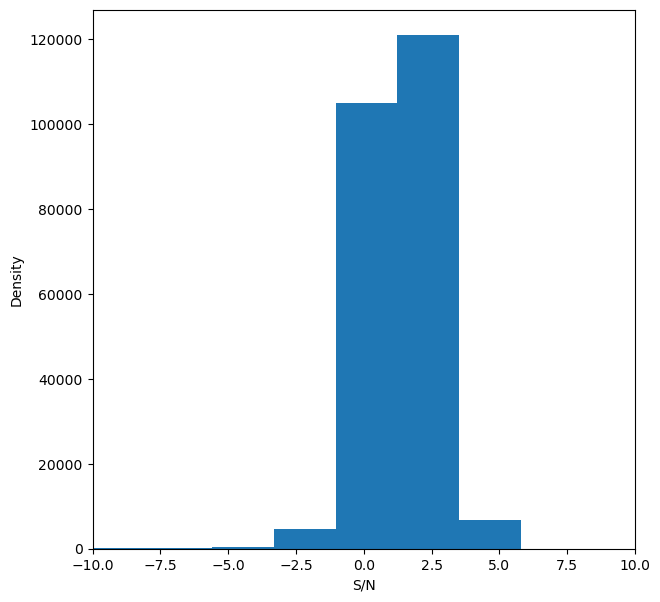

In [21]:
fig, ax = plt.subplots(1, figsize=(7,7))

ax.hist(SN, bins=60)

ax.set_xlabel('S/N')
ax.set_ylabel('Density')

ax.set_xlim(-10,10)

In [22]:
wav_dict = {w:[] for w in np.unique(wav_order_grid)}

In [23]:
for i in range(n_exps):
    for j in range(n_orders):
        for k in range(n_pixels):
            
            w = spec_data_interp[i,j,k,0]
            f = spec_data_interp[i,j,k,1]
            s = spec_data_interp[i,j,k,2]
            
            wav_dict[w].append([f,s])

In [57]:
wav_stitch = np.unique(wav_order_grid)

In [58]:
flux_stitch = np.zeros(len(wav_stitch))
err_stitch = np.zeros(len(wav_stitch))
reject_stitch_1 = np.zeros(len(wav_stitch))
reject_stitch_2 = np.zeros(len(wav_stitch))

In [59]:
for i in range(len(wav_stitch)):
    
    # Get wavelength, and quantities (flux, error) to be combined
    w = wav_stitch[i]
    spec_arr = np.array(wav_dict[w])
    flux_arr = spec_arr[:,0]
    err_arr = spec_arr[:,1]
    
    obs_count = len(flux_arr)
    
    # Let's reject points with S/N < -3
    thresh = -3
    idx_1 = flux_arr/err_arr < thresh
        
    reject_stitch_1[i] = np.sum(idx_1)/obs_count
    
    flux_arr = flux_arr[~idx_1]
    err_arr = err_arr[~idx_1]
    
    # Next, after rejecting these points, perform median filtering
    mu = np.median(flux_arr)
    sigma = np.sqrt(np.mean((flux_arr-mu)**2))

    eps = 3
    idx_2 = np.abs(flux_arr-mu)>eps*sigma
    
    reject_stitch_2[i] = np.sum(idx_2)/obs_count
    
    flux_arr = flux_arr[~idx_2]
    err_arr = err_arr[~idx_2]  
    
    wts_arr = 1/err_arr**2
    
    wts_arr /= np.sum(wts_arr)
    
    flux_stitch[i] = np.sum(wts_arr*flux_arr)
    err_stitch[i] = np.sqrt(np.sum(wts_arr**2*err_arr**2))

In [60]:
np.sum(reject_stitch_1 > 0)/len(reject_stitch_1)

0.014086552425210572

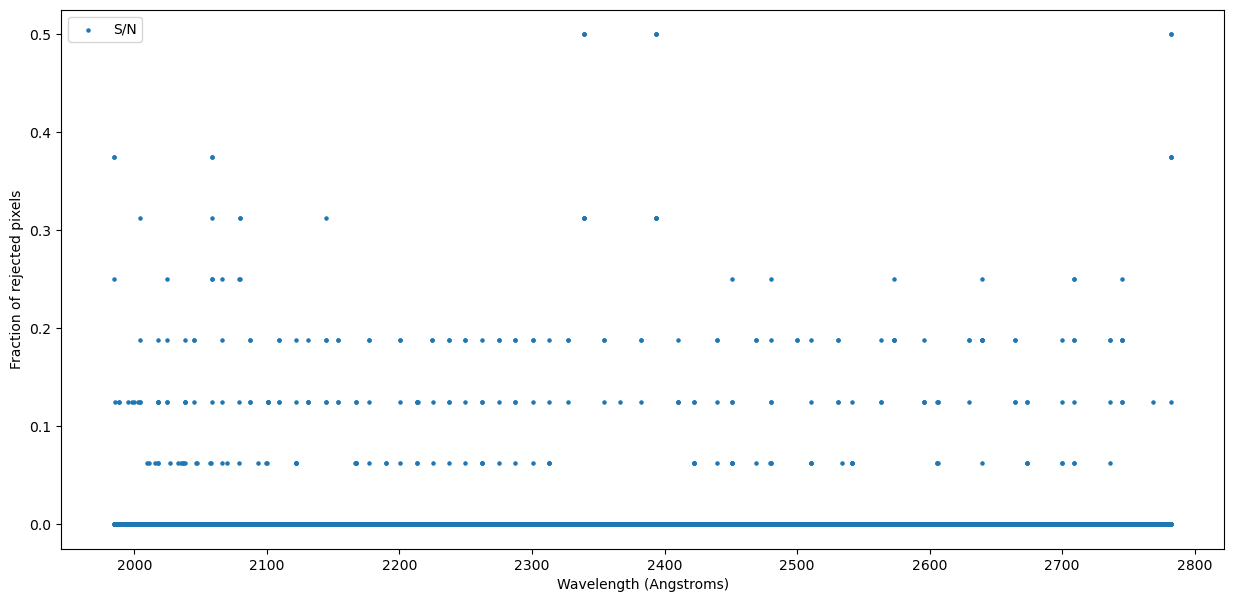

In [61]:
fig, ax = plt.subplots(1, figsize=(15,7))

ax.scatter(wav_stitch, reject_stitch_1, s=5, label='S/N')
#ax.scatter(wav_stitch, reject_stitch_2, s=5, label='Median')

ax.set_xlabel('Wavelength (Angstroms)')
ax.set_ylabel('Fraction of rejected pixels')

ax.legend()

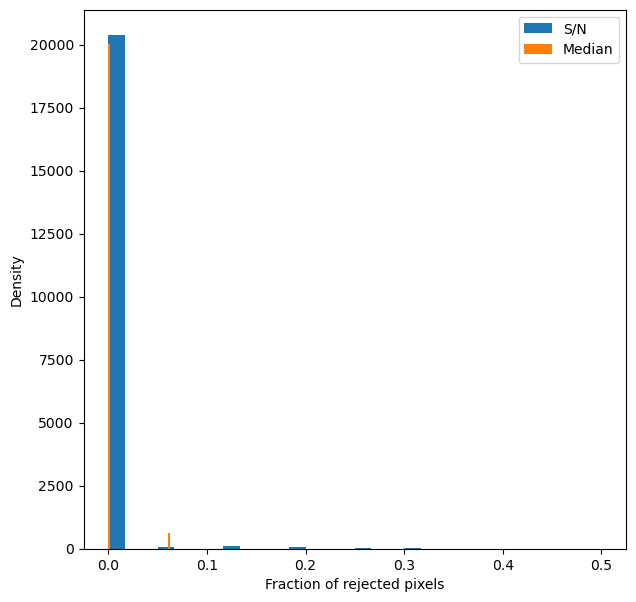

In [62]:
fig, ax = plt.subplots(1, figsize=(7,7))

ax.hist(reject_stitch_1, bins=30, label='S/N')
ax.hist(reject_stitch_2, bins=30, label='Median')

ax.set_xlabel('Fraction of rejected pixels')
ax.set_ylabel('Density')
ax.legend()

Throw out some initial bad points

In [63]:
n_trim = 15

In [64]:
wav_stitch = wav_stitch[n_trim:-n_trim]
flux_stitch = flux_stitch[n_trim:-n_trim]
err_stitch = err_stitch[n_trim:-n_trim]

Compare with old stitch

In [65]:
spec_data_old = fits.open(rootdir + 'Old/Stitched/' + QSO_name + '_E230M.fits')

In [66]:
spec_stitch_old = pd.DataFrame(spec_data_old[1].data).to_numpy()

In [67]:
wav_stitch_old = spec_stitch_old[:,0]
flux_stitch_old = spec_stitch_old[:,1]
err_stitch_old = spec_stitch_old[:,2]

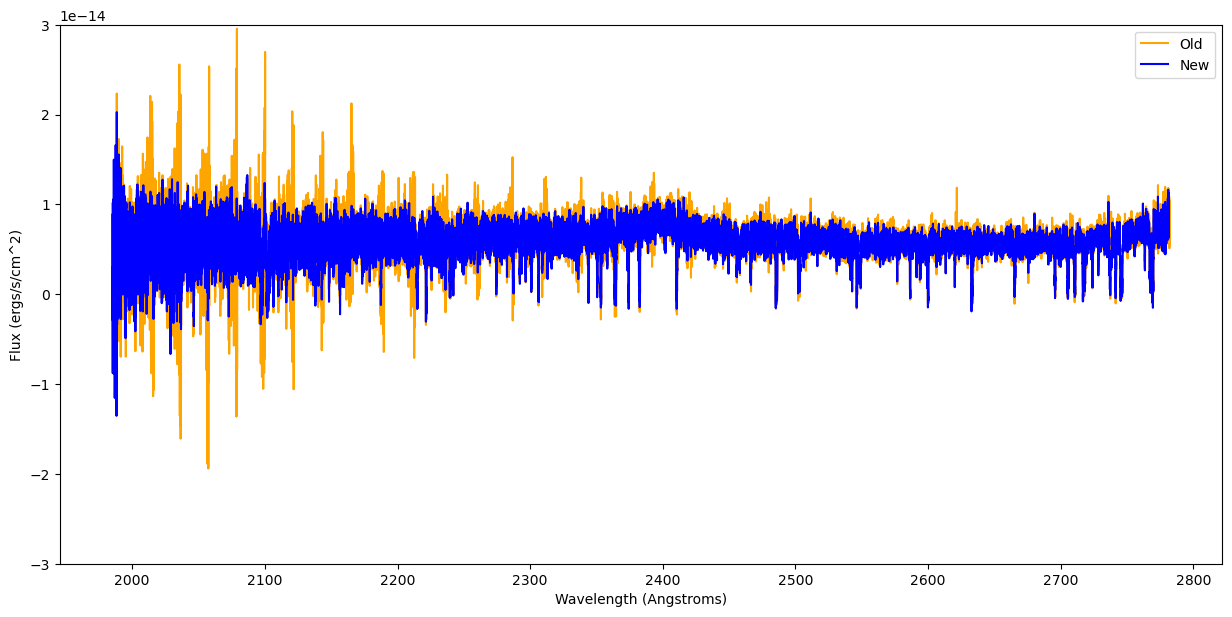

In [68]:
fig, ax = plt.subplots(1, figsize=(15,7))

ax.plot(wav_stitch_old, flux_stitch_old, label='Old', color='orange')
ax.plot(wav_stitch, flux_stitch, label='New', color='blue')
ax.set_xlabel('Wavelength (Angstroms)')
ax.set_ylabel('Flux (ergs/s/cm^2)')

#ax.set_xlim(2065.5,2065.7)
ax.set_ylim(-3e-14,3e-14)
#ax.set_xlim()
ax.legend()

(-1e-15, 1.9e-14)

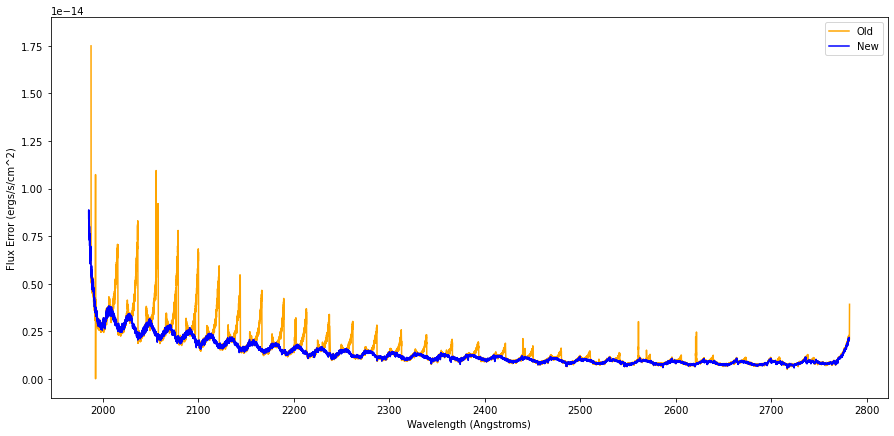

In [34]:
fig, ax = plt.subplots(1, figsize=(15,7))

ax.plot(wav_stitch_old, err_stitch_old, label='Old', color='orange')
ax.plot(wav_stitch, err_stitch, label='New', color='blue')
ax.set_xlabel('Wavelength (Angstroms)')
ax.set_ylabel('Flux Error (ergs/s/cm^2)')
ax.legend()

#ax.set_xlim(2065.5,2065.7)
ax.set_ylim(-1e-15,1.9e-14)

Zoom-in plots

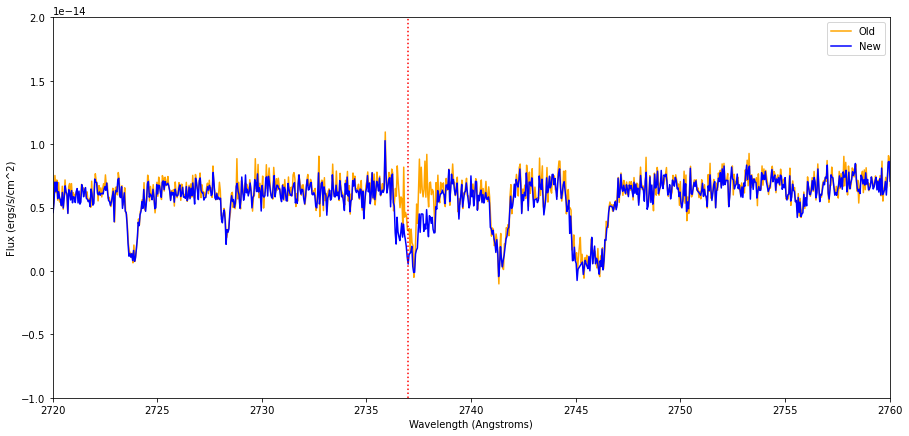

In [35]:
fig, ax = plt.subplots(1, figsize=(15,7))

ax.plot(wav_stitch_old, flux_stitch_old, label='Old', color='orange')
ax.plot(wav_stitch, flux_stitch, label='New', color='blue')
ax.axvline(2737, color='red', linestyle=':')
ax.set_xlabel('Wavelength (Angstroms)')
ax.set_ylabel('Flux (ergs/s/cm^2)')

ax.set_xlim(2720, 2760)
ax.set_ylim(-1e-14,2e-14)
#ax.set_xlim()
ax.legend()

(4e-16, 1.5e-15)

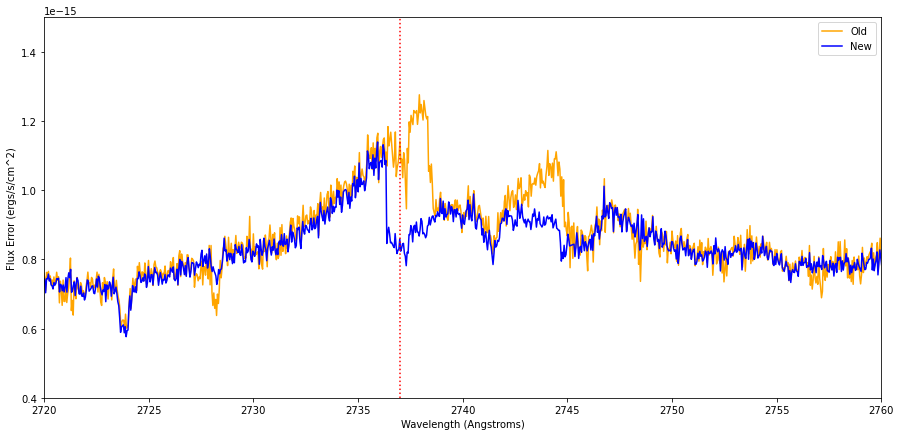

In [36]:
fig, ax = plt.subplots(1, figsize=(15,7))

ax.plot(wav_stitch_old, err_stitch_old, label='Old', color='orange')
ax.plot(wav_stitch, err_stitch, label='New', color='blue')
ax.axvline(2737, color='red', linestyle=':')
ax.set_xlabel('Wavelength (Angstroms)')
ax.set_ylabel('Flux Error (ergs/s/cm^2)')
ax.legend()


ax.set_xlim(2720, 2760)
ax.set_ylim(4e-16,1.5e-15)

Store the new reduction in a FITS file

In [37]:
spec_data_old.info()

Filename: /Users/thepoetoftwilight/Documents/CUBS/Data/PG1522+101/STIS/Old/Stitched/PG1522+101_E230M.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       4   ()      
  1                1 BinTableHDU     37   20854R x 10C   ['E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'D']   


In [38]:
spec_data_old[1].header

XTENSION= 'BINTABLE'           /Binary table written by MWRFITS v1.12a          
BITPIX  =                    8 /Required value                                  
NAXIS   =                    2 /Required value                                  
NAXIS1  =                   44 /Number of bytes per row                         
NAXIS2  =                20854 /Number of rows                                  
PCOUNT  =                    0 /Normally 0 (no varying arrays)                  
GCOUNT  =                    1 /Required value                                  
TFIELDS =                   10 /Number of columns in table                      
COMMENT                                                                         
COMMENT  *** End of mandatory fields ***                                        
COMMENT                                                                         
COMMENT                                                                         
COMMENT  *** Column names **

In [39]:
c1 = fits.Column(name='WAVE    ', array=wav_stitch, format='E')
c2 = fits.Column(name='FLUX    ', array=flux_stitch, format='E')
c3 = fits.Column(name='ERROR   ', array=err_stitch, format='E')
c4 = fits.Column(name='MASK    ', array=np.ones(len(wav_stitch)), format='J')
c5 = fits.Column(name='FLUX_NONORM', array=np.zeros(len(wav_stitch)), format='E')
c6 = fits.Column(name='ERROR_NONORM', array=np.zeros(len(wav_stitch)), format='E')
c7 = fits.Column(name='CONTINUUM', array=np.zeros(len(wav_stitch)), format='E')
c8 = fits.Column(name='MODEL   ', array=np.zeros(len(wav_stitch)), format='E')
c9 = fits.Column(name='FEATURE ', array=np.zeros(len(wav_stitch)), format='E')
c10 = fits.Column(name='FEATURE_REDSHIFT', array=-np.ones(len(wav_stitch)), format='E')

In [40]:
table_hdu = fits.BinTableHDU.from_columns([c1, c2, c3, c4, c5, 
                                           c6, c7, c8, c9, c10])

In [41]:
hdu = fits.HDUList([spec_data_old[0], table_hdu])

In [42]:
#hdu.writeto(rootdir + 'Old/Stitched/' + QSO_name + '_E230M_new.fits')

Write out in a new format

In [43]:
c1 = fits.Column(name='wave    ', array=wav_stitch, format='D')
c2 = fits.Column(name='flux    ', array=flux_stitch, format='D')
c3 = fits.Column(name='error   ', array=err_stitch, format='D')
c4 = fits.Column(name='error_u ', array=err_stitch, format='D')
c5 = fits.Column(name='error_d ', array=err_stitch, format='D')
c6 = fits.Column(name='counts_total', array=np.zeros(len(wav_stitch)), format='D')
c7 = fits.Column(name='counts_net', array=np.zeros(len(wav_stitch)), format='D')
c8 = fits.Column(name='npix    ', array=np.zeros(len(wav_stitch)), format='D')
c9 = fits.Column(name='exptime ', array=np.zeros(len(wav_stitch)), format='D')
c10 = fits.Column(name='mask    ', array=np.ones(len(wav_stitch)), format='K')
c11 = fits.Column(name='continuum', array=np.zeros(len(wav_stitch)), format='D')

In [44]:
table_hdu = fits.BinTableHDU.from_columns([c1, c2, c3, 
                                           c4, c5, c6, 
                                           c7, c8, c9, 
                                           c10, c11])

In [45]:
hdu = fits.HDUList([spec_data_old[0], table_hdu])

In [46]:
#hdu.writeto(rootdir + QSO_name + '_E230M_new_pabs0.fits')